In [1]:
from constants import *
import numpy as np
import matplotlib.pyplot as plt
from gw_waveform_res import waveform

from gw_functions import get_gw_ra_dec

In [2]:
M=2e10;q=1;et0=1.1;b=50;ti=-5;tf=5;t_step=1000;inc=pi/3;distance=5;order=3

In [5]:
psrra, psrdec=get_gw_ra_dec(19,9,-37,44)
gwra=(19 + 0 + 0 ) * np.pi/12.
gwdec= (0 + 0 + 0 ) * np.pi/180.

In [12]:
z=waveform(M,q,et0,b,ti,tf,t_step,inc,distance,psrra, psrdec,gwra,gwdec)
z1=waveform(M,q,et0,b,ti,tf,t_step,inc,distance,estimatepeak='True')

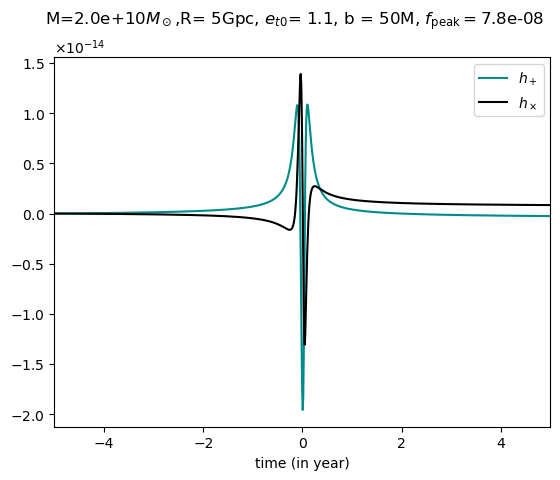

In [43]:
plt.plot(z1.get_sampletimes,z1.hp,color='darkcyan',label=r'$h_+$')
plt.plot(z1.get_sampletimes,z1.hx,color='k',label=r'$h_\times$')
plt.xlabel('time (in year)')
#plt.ylabel(r'$H_{\times|Q}$ (in fully 3PN orbit)')
plt.legend()
plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0),useMathText=True)
plt.suptitle('M='+str("{:.1e}".format(M))+r"$M_\odot$,"'R= '+str(distance)
             +'Gpc, $e_{t0}$= '+str(et0)+', b = '
             +str(b)+r"M"+r', $f_{\rm{peak}}=$'+str("{:.1e}".format(z1.peak)))
plt.xlim([ti,tf])
plt.show()

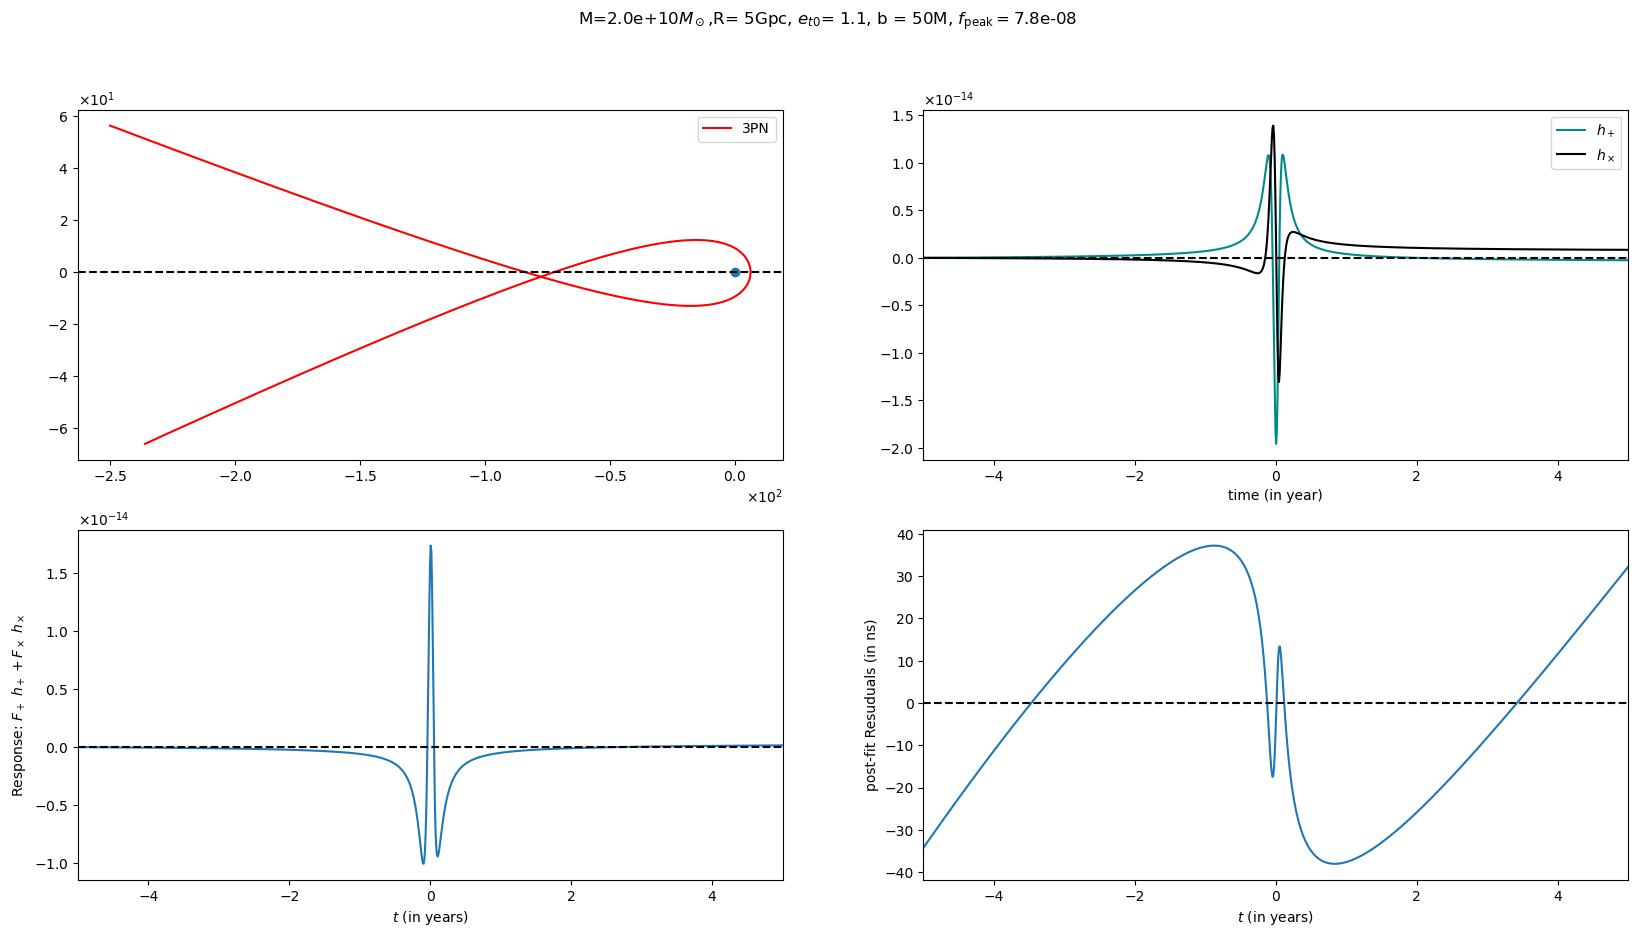

In [48]:
import matplotlib.gridspec as gridspec
#figsize=(15,12)
fig=plt.figure(figsize=(20,10))


plt.subplot(2,2,1)
plt.plot(z1.x,z1.y,color='r',label='3PN')
plt.axhline(y=0, color='k', linestyle='--')
plt.scatter(0,0)
plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0),useMathText=True)
plt.ticklabel_format(axis='x',style='sci',scilimits=(0,0),useMathText=True)
plt.legend()

plt.subplot(2,2,2)

plt.plot(z1.get_sampletimes,z1.hp,color='darkcyan',label=r'$h_+$')
plt.plot(z1.get_sampletimes,z1.hx,color='k',label=r'$h_\times$')
plt.xlim([ti,tf])
plt.xlabel('time (in year)')
#plt.ylabel(r'$H_{\times|Q}$ (in fully 3PN orbit)')
plt.legend()
plt.axhline(y=0,color='k', linestyle='--')
plt.legend()
plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0),useMathText=True)

plt.subplot(2,2,3)

plt.plot(z.get_sampletimes,z.response)
plt.xlabel(r'$t$ (in years)')
plt.xlim([ti,tf])
plt.ylabel(r'Response: $F_+ \ h_+ +F_\times \ h_\times$')
plt.axhline(y=0,color='k', linestyle='--')
plt.xlim([ti,tf])
plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0),useMathText=True)


plt.subplot(2,2, 4)


plt.plot(z.get_sampletimes,z.postfitres)
plt.xlabel(r'$t$ (in years)')
plt.xlim([ti,tf])
plt.ylabel('post-fit Resuduals (in ns)')
plt.axhline(y=0,color='k', linestyle='--')

plt.suptitle('M='+str("{:.1e}".format(M))+r"$M_\odot$,"'R= '+str(distance)
             +'Gpc, $e_{t0}$= '+str(et0)+', b = '
             +str(b)+r"M"+r', $f_{\rm{peak}}=$'+str("{:.1e}".format(z1.peak)))


plt.show()